### PROBLEM STATEMENT :
**To predict the CO2 emissions (g/km) from a vehicle in Canada depending on the fuel consumption and other describing features of a vehicle**

### EXPLORATORY DATA ANALYSIS (EDA)
Objective of EDA :                                                                       
`1.` To check for missing data and other anamolies.                                                                                                            
`2.` To check the distribution of the data.                                                                                                                    
`3.` Identify the most influential variables

In [ ]:
# read the necessary libraries and datasset
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

co2_emission = pd.read_csv("CO2 Emissions_Canada.csv")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# print first 5 rows of the dataset 
co2_emission.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# shape of the dataset
co2_emission.shape

(7385, 12)

In [4]:
# get some information
co2_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### Explain The data
1. There are total 7385 row/samples and 12 columns/features.
2. 11 of the features are predictor and one is regressor
3. 5 of the 12 column are of object datatype, 3 integer and 4 are float type.
4. We can see that there are total 7 columns with numerical values and other 5 have character values.
5. The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
6. The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.¶

In [38]:
cat_columns = co2_emission.select_dtypes(['int64' , 'float64']).columns
cat_columns 

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

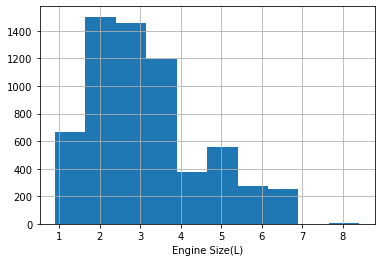

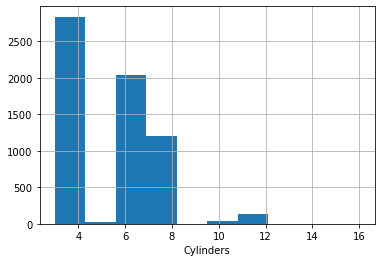

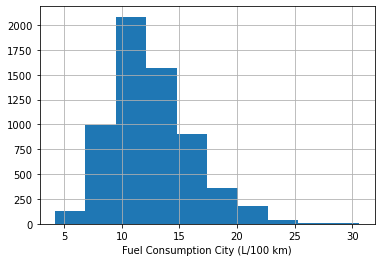

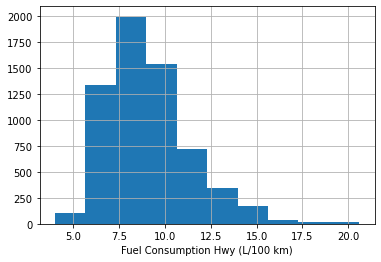

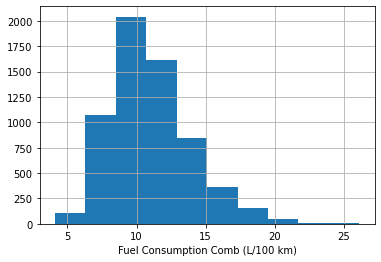

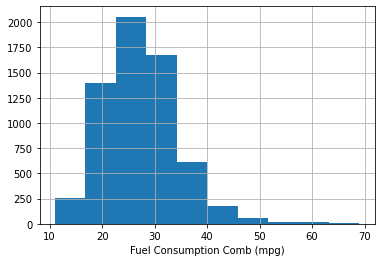

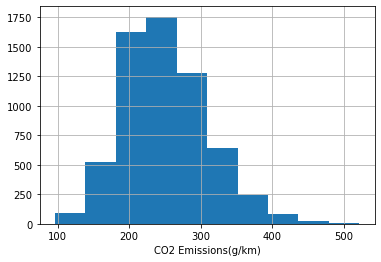

In [39]:
for i in cat_columns:
    co2_emission[i].hist()
    plt.xlabel(i)
    plt.show()

In [40]:
# check for null values 
co2_emission.isnull().sum() / len(co2_emission)

Engine Size(L)                      0.0
Cylinders                           0.0
Fuel Consumption City (L/100 km)    0.0
Fuel Consumption Hwy (L/100 km)     0.0
Fuel Consumption Comb (L/100 km)    0.0
                                   ... 
Fuel Type_D                         0.0
Fuel Type_E                         0.0
Fuel Type_N                         0.0
Fuel Type_X                         0.0
Fuel Type_Z                         0.0
Length: 2150, dtype: float64

In [8]:
# check for duplicates
co2_emission.duplicated().sum()

1103

In [9]:
#drop duplicates
co2_emission.drop_duplicates(inplace = True)

# Visualize The Data

In [12]:
def explore_cat_feature(feature):
    group = co2_emission.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots = group['CO2 Emissions(g/km)'].sort_values().plot(kind = 'bar', fontsize=15)
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Mean Co2 Emission', fontsize=15);
    plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)

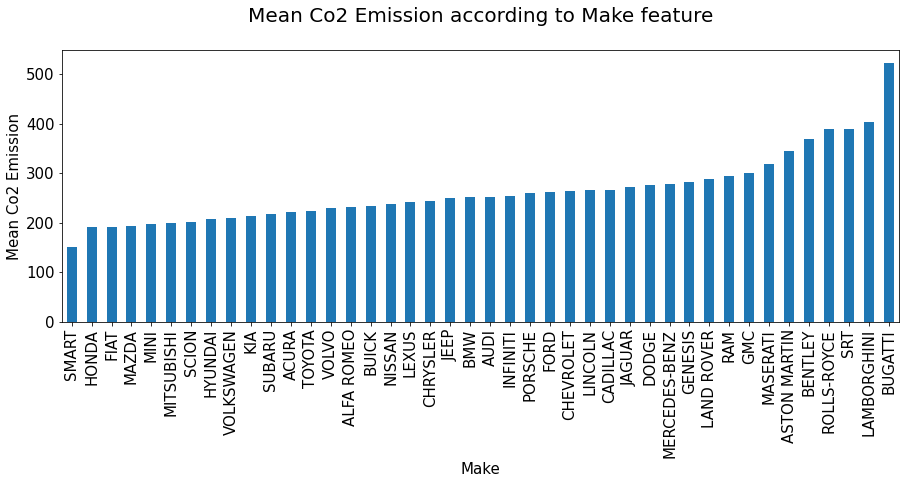

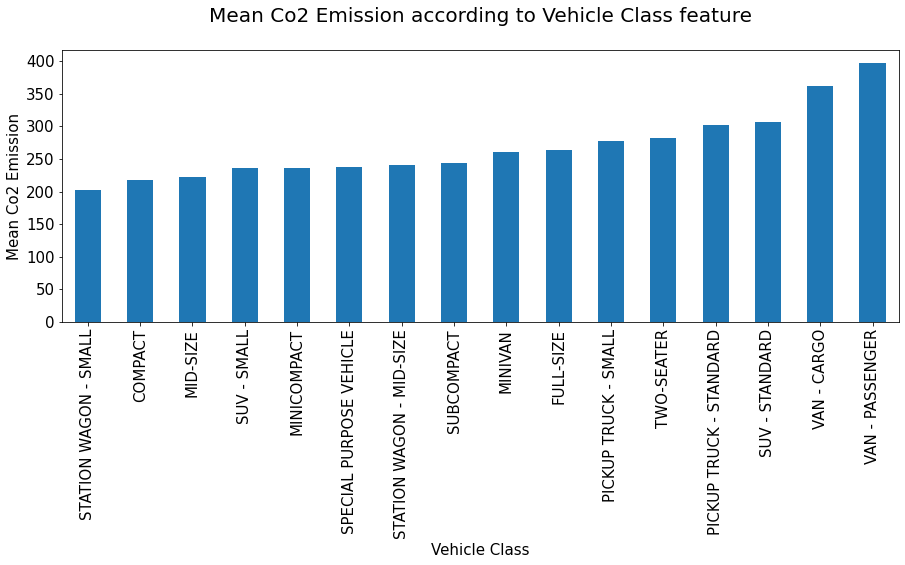

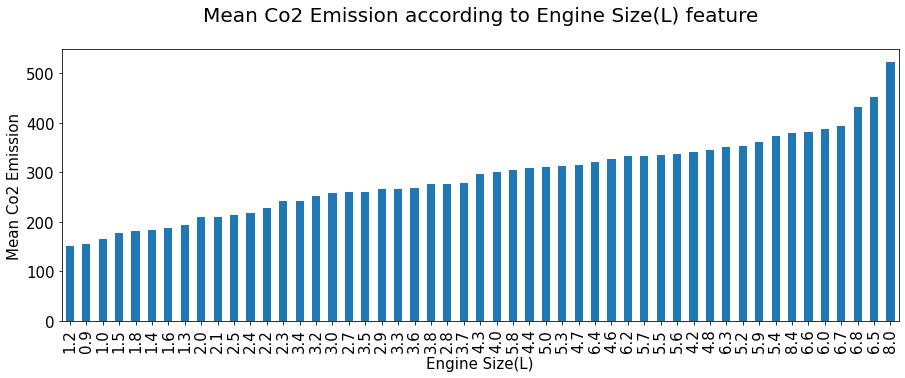

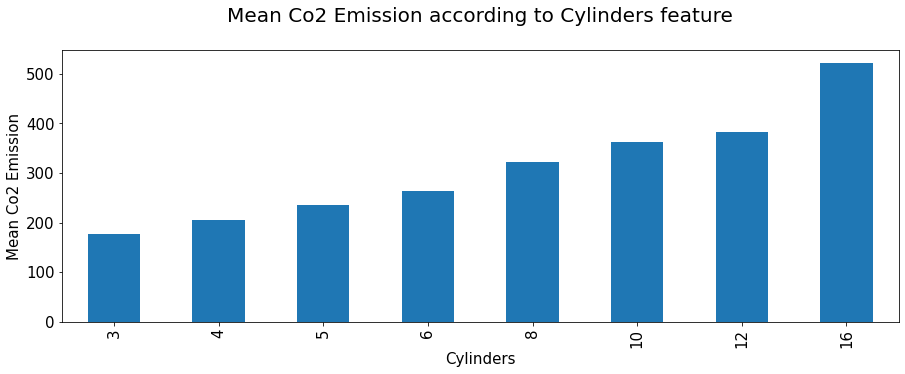

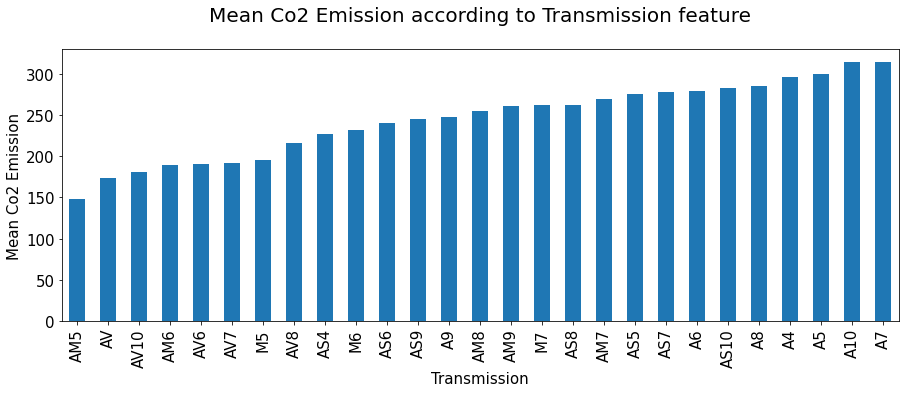

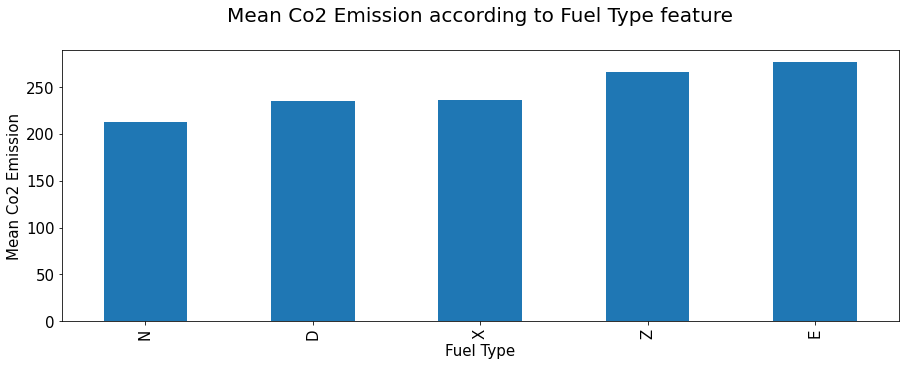

In [13]:
for feature in ['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']:
    explore_cat_feature(feature)

In [14]:
def explore_num_feature(feature):
    plt.figure(figsize=[15,5])
    plt.scatter(co2_emission[feature], co2_emission['CO2 Emissions(g/km)'])
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Co2 Emission', fontsize=15);
    plt.title(" Co2 Emission vs. {} \n".format(feature), fontsize=20)

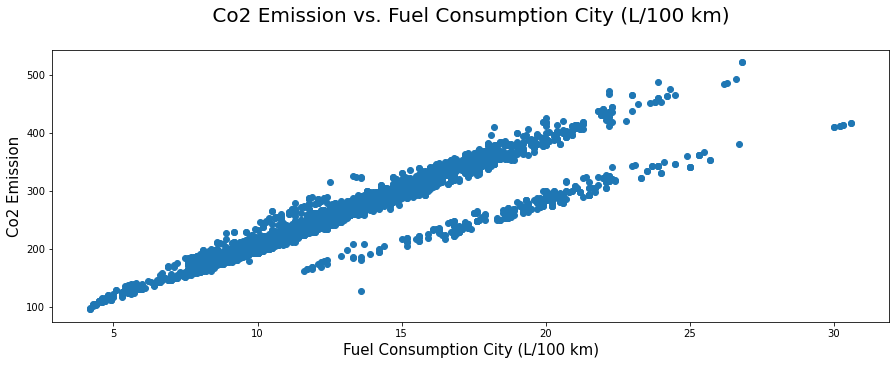

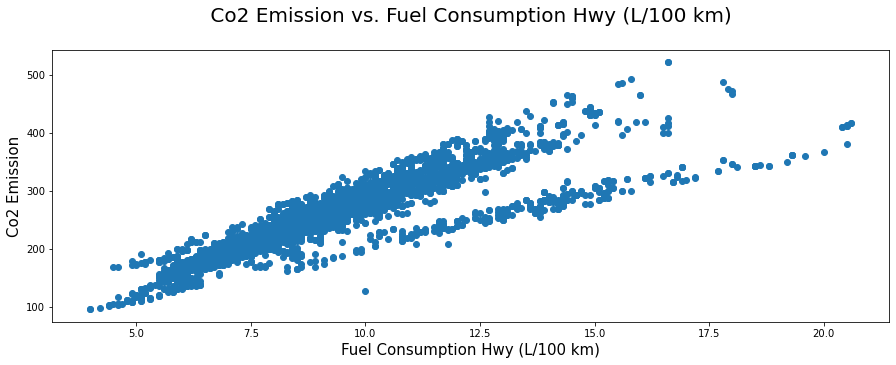

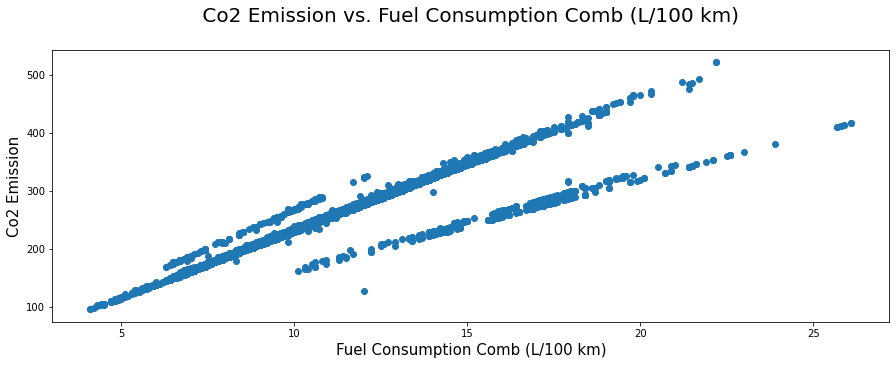

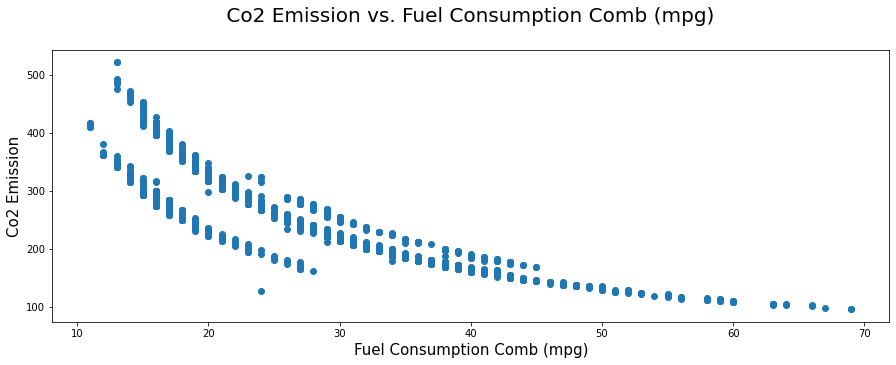

In [15]:
for feature in ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']:
    explore_num_feature(feature)

In [16]:
# get the correlation
co2_emission.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


## Drop The Categorical  Columns

In [17]:
df = co2_emission.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)', 'Transmission', 'Fuel Type', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],axis=1)
df.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### Split the data to train and test

In [18]:
X = df.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df["CO2 Emissions(g/km)"]

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Apply linear regression model and cross validation

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)

LinearRegression()

### Calculate the score of train and test

In [21]:
print('Training Accuracy: ', lin_reg.score(X_train, y_train))
print('Testing Accuracy: ', lin_reg.score(X_test, y_test))

Training Accuracy:  0.8786148666395369
Testing Accuracy:  0.8786783058892105


In [22]:
cross_val_score(lin_reg , X , y , cv = 10 , scoring = "r2").mean()

0.8747900445287506

### Apply Ridge and RidgeCV

In [23]:
from sklearn.linear_model import RidgeCV, Ridge
ridge_cv = RidgeCV(alphas = 10**np.linspace(10,-2,100), scoring = "neg_mean_squared_error", normalize = True)
ridge_cv.fit(X_train, y_train)
print('Alpha= ', ridge_cv.alpha_)

ridge_tuned = Ridge(alpha = ridge_cv.alpha_,  normalize = True).fit(X_train,y_train)
print('Training Accuracy: ', ridge_tuned.score(X_train, y_train))
print('Testing Accuracy: ', ridge_tuned.score(X_test, y_test))

Alpha=  0.01
Training Accuracy:  0.8785325179999944
Testing Accuracy:  0.8786342942824651


# Apply Models with all columns to check accuracy

In [24]:
# convert categorical to numbers
co2_emission = pd.get_dummies(co2_emission)

In [25]:
co2_emission.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Linear regression

In [26]:
X = co2_emission.drop(['CO2 Emissions(g/km)'], axis= 1)
y = co2_emission["CO2 Emissions(g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44 )
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('Training Accuracy: ', lin_reg.score(X_train, y_train))
print('Testing Accuracy: ', lin_reg.score(X_test, y_test))

Training Accuracy:  0.9974472888993087
Testing Accuracy:  -1.3807252515791735e+19


### Ridge

In [27]:
ridge= Ridge(alpha =0.001,  normalize = True).fit(X_train,y_train)
print('Training Accuracy: ', ridge.score(X_train, y_train))
print('Testing Accuracy: ', ridge.score(X_test, y_test))

Training Accuracy:  0.9975143655484559
Testing Accuracy:  0.9914147827811239


### Lasso

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01).fit(X_train, y_train)
print('Training Accuracy: ', lasso.score(X_train, y_train))
print('Testing Accuracy: ', lasso.score(X_test, y_test))

Training Accuracy:  0.9937361345900652
Testing Accuracy:  0.9919627234956185


### RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 44)
rf.fit(X_train, y_train)
print('Training Accuracy: ', rf.score(X_train, y_train))
print('Testing Accuracy: ', rf.score(X_test, y_test))

Training Accuracy:  0.9994212896709307
Testing Accuracy:  0.9967859480994233


### cross_val_score

In [30]:
from sklearn.model_selection import cross_val_score
print('Lasso Cross Validation: ' , cross_val_score(lasso, X, y, cv=5))
print('RandomForest Cross Validation: ' , cross_val_score(rf, X, y, cv=5))

Lasso Cross Validation:  [0.98401991 0.98824458 0.99314247 0.99517166 0.99592749]
RandomForest Cross Validation:  [0.9938739  0.99452081 0.99582832 0.99617647 0.99828344]
